**<font color=red> IMDB VERİLERİNİ KULLANARAK ÖNERİ ALGORİTMALARI GELİŞTİRMEK**

Bu projede imdb film ve özelliklerinin bulunduğu veri setini kullanarak film öneri sistemlerini kurmaya çalışacağız.

**<font color=red>1-VERİ YÜKLEME, BİRLEŞTİRME VE TEMİZLEME**

**<font color=red> 1- VERİ YÜKLEME, BİRLEŞTİRME VE TEMİZLEME İŞLEMİ </font>**

2 adet verimizi "movie_id" ve "id" sutunları üzerinden birleştireceğiz Ve ihtiyacımız olmayan alanların bir kısmını verimizden sileceğiz

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df_credits = pd.read_csv("tmdb_5000_credits.csv")
df_credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [242]:
df_movies = pd.read_csv("tmdb_5000_movies.csv")
df_movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [243]:
# Verilerimizin kaç satır kaç sütundan oluştuğunu görelim
print("df_movies : ",df_movies.shape)
print("df_credits : ",df_credits.shape)

df_movies :  (4803, 20)
df_credits :  (4803, 4)


In [244]:
# Credits verimizin sütunlarını görmek için
df_credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [245]:
# Movies verimizin sütunlarını görmek için
df_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [246]:
# İki dosyayı birleştirebilmemiz için aynı sütun isimlerine sahip olmaları gerekiyor. "id" ve "movie_id" aynı verileri içeriyor fakat isimleri farklı. bu yüzden "id" ismini "movie_id" olarak değiştirip bu kolon üzerinden birleştirme yapabiliriz.

df_movies.rename(columns={"id":"movie_id"},inplace=True)
df_movies.columns

Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [247]:
# Veri dosyalarımızı "merge" fonksiyonu ile birleştiriyoruz
df = df_movies.merge(df_credits, on="movie_id")
df.head(3)

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [248]:
df.shape

(4803, 23)

In [249]:
#Budget, Homepage ve Status alanlarını veri setimizden çıkarıyoruz
df.drop(columns=["budget","homepage","status"],inplace=True)

In [250]:
df.shape

(4803, 20)

**<font color=red> 2 - TEMEL DÜZEY ÖNERİ SİSTEMİ - BASIC RECOMMENDATION SYSTEM** 

Bu alanda  popüler film değerlendirme yöntemi olan "Weighted Rating" - "Ağırlıklı Puan" hesabını kullanacağız. Bu formül, hem bir filmin aldığı oy sayısı hem de ortalama oy değeri üzerinden bir ağırlıklandırma yaparak bir filmin genel değerini hesaplamak için kullanılır


In [251]:
# V:Filmlere verilen toplam oy sayısı.
# R:Bir filmin ortalama oy değeri.
# C:Tüm filmlerin ortalama oy değeri.
# m:Film için verilen oyların toplam sayısının çeyreği.

V = df["vote_count"]                    
R = df["vote_average"]                  
C = df["vote_average"].mean()               
m = df["vote_count"].quantile(0.75)  

# formülümüzü yazıyoruz

df['weighted_average'] = (V/(V+m) * R) + (m/(m+V) * C)


In [252]:
#Burada tüm verilerimizi azalan şekilde sıralıyoruz(Hesapladığımız Ağırlıklı Puan sütunu üzerinden)
#Sıralama yaptırdığımız yeni veri setimizi belli sütunları göstererek listeliyoruz

df = df.sort_values(by="weighted_average",ascending=False)
df[['original_title','vote_count','vote_average','popularity','weighted_average']].head()

,original_title,vote_count,vote_average,popularity,weighted_average
1881,The Shawshank Redemption,8205,8.5,136.747729,8.301547
3337,The Godfather,5893,8.4,143.659698,8.143459
662,Fight Club,9413,8.3,146.757391,8.139688
3232,Pulp Fiction,8428,8.3,121.463076,8.122458
65,The Dark Knight,12002,8.2,187.322927,8.078054


**<font color=red>GRAFİK ÜZERİNDE GÖSTERMEK**

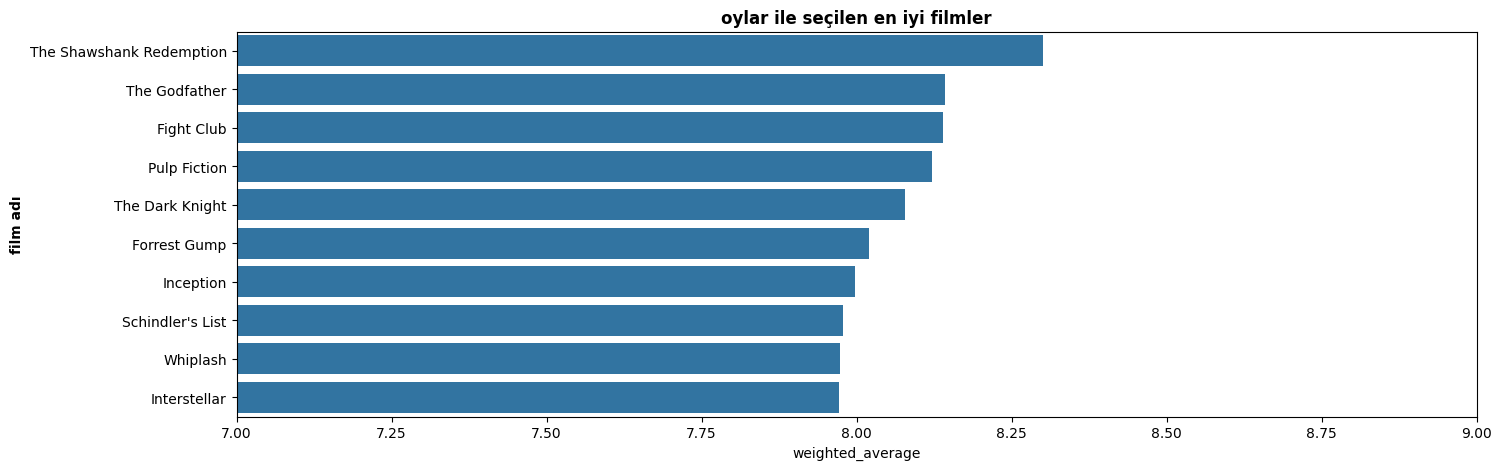

In [253]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x=df.weighted_average.head(10), y=df.original_title.head(10))
plt.xlim(7,9)
plt.title("oylar ile seçilen en iyi filmler",weight="bold")
plt.ylabel("film adı", weight="bold")
plt.show()

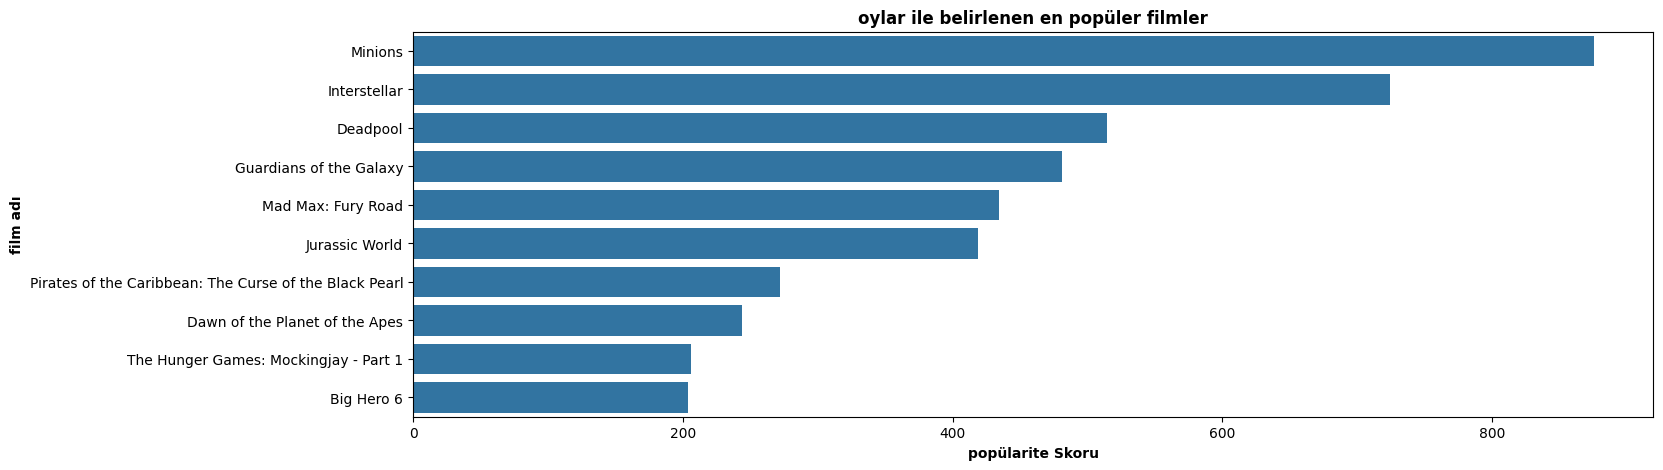

In [254]:
popular = df.sort_values(by="popularity",ascending=False)

plt.figure(figsize=(16,5))
ax = sns.barplot(x=popular.popularity.head(10), y=popular.original_title.head(10))
plt.title("oylar ile belirlenen en popüler filmler",weight="bold")
plt.xlabel("popülarite Skoru",weight="bold")
plt.ylabel("film adı",weight="bold")
plt.show()

**<font color=red> 3 - İÇERİK TABANLI ÖNERİ SİSTEMİ - CONTENT-BASE RECOMMENDATION SYSTEM**

In [255]:
#Film hakkında önizleme yazılarını listeliyoruz. overview ile işlem yapacağımız için;
df["overview"].head()

1881    Framed in the 1940s for the double murder of h...
3337    Spanning the years 1945 to 1955, a chronicle o...
662     A ticking-time-bomb insomniac and a slippery s...
3232    A burger-loving hit man, his philosophical par...
65      Batman raises the stakes in his war on crime. ...
Name: overview, dtype: object

In [256]:
df.overview.isnull().sum()

3

In [257]:
# overview ile işlem yapacağım için onu "" bu şekilde doldurmayı tercih ettim.
df["overview"] = df["overview"].fillna("")
df.overview.isnull().sum()

0

In [258]:
# Filmlerimizi tanımlayan kelimeleri ve sıklıklarını hesaplıyoruz.Benzerliklerini anlayabilmemiz için Matrix dönüşümü uyguluyoruz

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])

**<font color=red>COSINE BENZERLİĞİNİ KULLANMAK**

Projemizde Cosine Benzerliğini kullanarak benzerlik puanlarımızı bulacağız

In [259]:
from sklearn.metrics.pairwise import linear_kernel
#cosine benzerliğini hesaplatıyoruz
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim 

array([[1.        , 0.00512658, 0.00593711, ..., 0.        , 0.00529314,
        0.02259398],
       [0.00512658, 1.        , 0.        , ..., 0.01524214, 0.03163389,
        0.        ],
       [0.00593711, 0.        , 1.        , ..., 0.01309099, 0.00616651,
        0.07145577],
       ...,
       [0.        , 0.01524214, 0.01309099, ..., 1.        , 0.        ,
        0.01096243],
       [0.00529314, 0.03163389, 0.00616651, ..., 0.        , 1.        ,
        0.00737208],
       [0.02259398, 0.        , 0.07145577, ..., 0.01096243, 0.00737208,
        1.        ]])

In [260]:
# indexlerin ve film başlıklarının ters haritasını oluşturuyoruz. Tekrar eden değerleri listeden çıkarıyoruz
indices = pd.Series(df.index, index=df['original_title']).drop_duplicates()
indices

original_title
The Shawshank Redemption    1881
The Godfather               3337
Fight Club                   662
Pulp Fiction                3232
The Dark Knight               65
                            ... 
Catwoman                     303
The Boy Next Door           3746
Dragonball Evolution        1652
Batman & Robin               210
Fantastic Four               242
Length: 4803, dtype: int64

In [261]:
# Bu fonksiyon ile fonksiyona göndermiş olduğumuz filme en yakın benzerlikte ki 10 filmi geri döndürecek

def get_recommendations(title, cosine_sim=cosine_sim):
    # Girilen filmin indeksini al
    idx = indices[title]

    # Bu filmin diğer tüm filmlerle olan benzerlik puanlarını listele
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filmleri benzerlik puanlarına göre sırala
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # En çok benzeyen 10 filmin skorunu al
    sim_scores = sim_scores[1:11]

    # Film indekslerini al
    movie_indices = [i[0] for i in sim_scores]

    # En çok benzeyen 10 filmi döndür
    return df['original_title'].iloc[movie_indices]


**<font color=red>ÖNERİ FONKSİYONUMUZ TAMAM. ÖRNEK YAPALIM**

In [262]:
#The Dark Knight içeriğine benzer 10 film önerisi
get_recommendations('The Dark Knight Rises')

3526            The Sting
3194       All or Nothing
3466        Sliding Doors
4624            Locker 13
2917          The Fighter
4036            Antibirth
3491         The Wackness
2849             Nebraska
3504                11:14
3346    Jumping the Broom
Name: original_title, dtype: object

In [263]:
get_recommendations('The Godfather')

1241                                       Sweet November
4423                                       Bang Bang Baby
4534    Deceptive Practice: The Mysteries and Mentors ...
765                                         Almost Famous
1817                                        The Bodyguard
4547                         Scott Walker: 30 Century Man
3069                                        Danny Collins
2920                                            If I Stay
4455                                     Ruby in Paradise
3484                            Hedwig and the Angry Inch
Name: original_title, dtype: object